# Traffic Light Classifier
---

In this project, you’ll use your knowledge of computer vision techniques to build a classifier for images of traffic lights! You'll be given a dataset of traffic light images in which one of three lights is illuminated: red, yellow, or green.

In this notebook, you'll pre-process these images, extract features that will help us distinguish the different types of images, and use those features to classify the traffic light images into three classes: red, yellow, or green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 
      The first step in any classification task is to be familiar with your data; you'll need to load in the images of traffic lights and visualize them!

2. **Pre-processing**. 
    The input images and output labels need to be standardized. This way, you can analyze all the input images using the same classification pipeline, and you know what output to expect when you eventually classify a *new* image.
    
3. **Feature extraction**. 
    Next, you'll extract some features from each image that will help distinguish and eventually classify these images.
   
4. **Classification and visualizing error**. 
    Finally, you'll write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label. You'll also be given code to determine the accuracy of your classification model.    
    
5. **Evaluate your model**.
    To pass this project, your classifier must be >90% accurate and never classify any red lights as green; it's likely that you'll need to improve the accuracy of your classifier by changing existing features or adding new features. I'd also encourage you to try to get as close to 100% accuracy as possible!
    
Here are some sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


---
### *Here's what you need to know to complete the project:*

Some template code has already been provided for you, but you'll need to implement additional code steps to successfully complete this project. Any code that is required to pass this project is marked with **'(IMPLEMENTATION)'** in the header. There are also a couple of questions about your thoughts as you work through this project, which are marked with **'(QUESTION)'** in the header. Make sure to answer all questions and to check your work against the [project rubric](https://review.udacity.com/#!/rubrics/1213/view) to make sure you complete the necessary classification steps!

Your project submission will be evaluated based on the code implementations you provide, and on two main classification criteria.
Your complete traffic light classifier should have:
1. **Greater than 90% accuracy**
2. ***Never* classify red lights as green**


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow, and green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for you to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

## Load the datasets

These first few lines of code will load the training traffic light images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("red", "yellow", "green"). 

You are encouraged to take a look at the `load_dataset` function in the helpers.py file. This will give you a good idea about how lots of image files can be read in from a directory using the [glob library](https://pymotw.com/2/glob/). The `load_dataset` function takes in the name of an image directory and returns a list of images and their associated labels. 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


## Visualize the Data

The first steps in analyzing any dataset are to 1. load the data and 2. look at the data. Seeing what it looks like will give you an idea of what to look for in the images, what kind of noise or inconsistencies you have to deal with, and so on. This will help you understand the image dataset, and **understanding a dataset is part of making predictions about the data**.

---
### Visualize the input images

Visualize and explore the image data! Write code to display an image in `IMAGE_LIST`:
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

See if you can display at least one of each type of traffic light image – red, green, and yellow — and look at their similarities and differences.

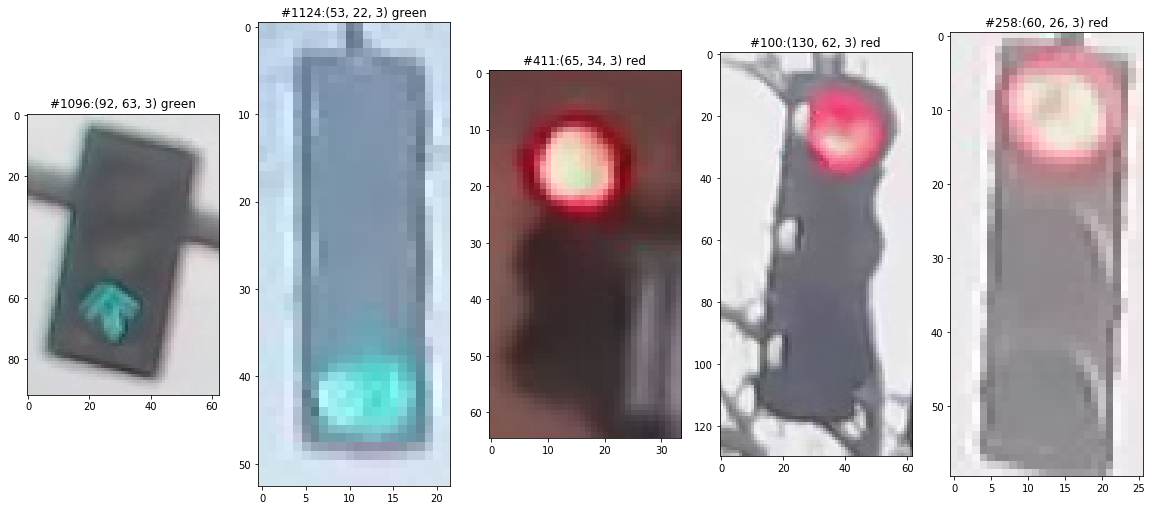

In [292]:
'''
Displays 5 images randomly selected from the non-standardized image list. Images are notated at top with image #, 
image shape, and label.
'''
num_imgs = 5
ax = [0] * num_imgs

f, ax = plt.subplots(1, num_imgs, figsize=(20,10))

img_nums = random.sample(range(len(IMAGE_LIST)), num_imgs)

for i, num in enumerate(img_nums):
    ax[i].set_title('#' + str(num) + ':' + str(IMAGE_LIST[num][0].shape)+' '+str(IMAGE_LIST[num][1]))
    ax[i].imshow(IMAGE_LIST[num][0])


# 2. Pre-process the Data

After loading in each image, you have to standardize the input and output!

### Input

This means that every input image should be in the same format, of the same size, and so on. We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is. For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

A red light should have the  label: [1, 0, 0]. Yellow should be: [0, 1, 0]. Green should be: [0, 0, 1]. These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<img src="images/processing_steps.png" width="80%" height="80%">


---
<a id='task2'></a>
### (IMPLEMENTATION): Standardize the input images

* Resize each image to the desired input size: 32x32px.
* (Optional) You may choose to crop, shift, or rotate the images in this step as well.

It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches. It's also important to make all your images the same size so that they can be sent through the same pipeline of classification steps!

In [5]:
def standardize_input(image):
    '''
    Takes in an RGB image and returns a new, standardized version
    '''    
    ## TODO: Resize image and pre-process so that all "standard" images are the same size  
    # standard_im = np.copy(image)
    standard_im = cv2.resize(image, (32, 32))
    
    return standard_im

## Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


---
<a id='task3'></a>
### (IMPLEMENTATION): Implement one-hot encoding

In [6]:
def one_hot_encode(label):
    '''
    Given a label - "red", "green", or "yellow" - return a one-hot encoded label
    Examples: 
    one_hot_encode("red") should return: [1, 0, 0]
    one_hot_encode("yellow") should return: [0, 1, 0]
    one_hot_encode("green") should return: [0, 0, 1]
    '''
    if label == 'red':
        one_hot_encoded = [1, 0, 0]
    elif label == 'yellow':
        one_hot_encoded = [0, 1, 0]
    elif label == 'green':
        one_hot_encoded = [0, 0, 1]
    else:
        raise ValueError("one_hot_encode() argument must be either red, yellow or green.")
    
    return one_hot_encoded


### Testing as you Code

After programming a function like this, it's a good idea to test it, and see if it produces the expected output. **In general, it's good practice to test code in small, functional pieces, after you write it**. This way, you can make sure that your code is correct as you continue to build a classifier, and you can identify any errors early on so that they don't compound.

All test code can be found in the file `test_functions.py`. You are encouraged to look through that code and add your own testing code if you find it useful!

One test function you'll find is: `test_one_hot(self, one_hot_function)` which takes in one argument, a one_hot_encode function, and tests its functionality. If your one_hot_label code does not work as expected, this test will print ot an error message that will tell you a bit about why your code failed. Once your code works, this should print out TEST PASSED.

In [7]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)


**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [8]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

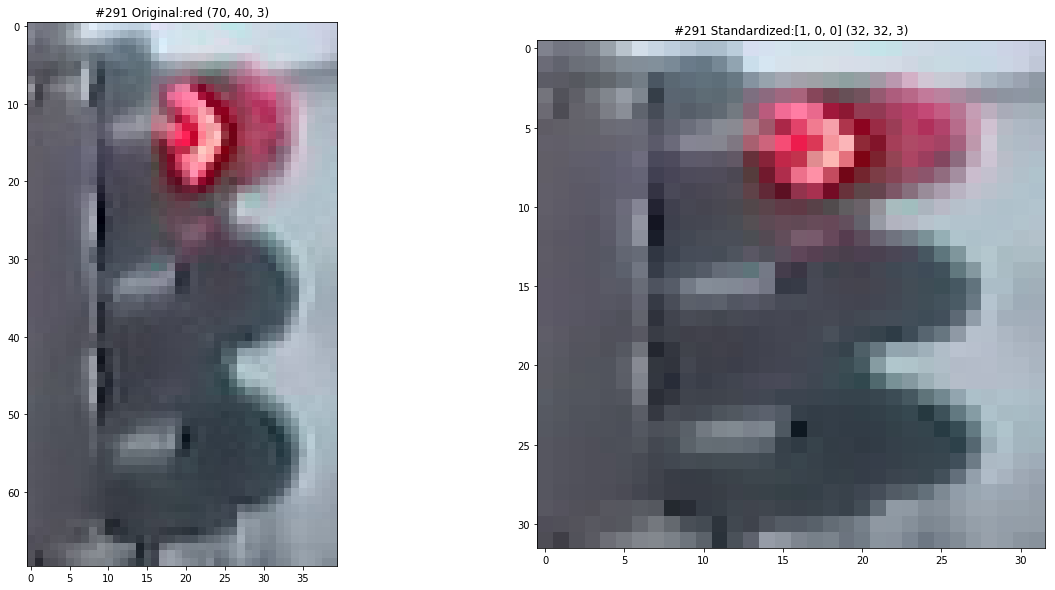

In [9]:
img_num = random.randint(0, len(IMAGE_LIST))

f, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].set_title('#' + str(img_num) + ' Original:' + str(IMAGE_LIST[img_num][1]) + ' ' + str(IMAGE_LIST[img_num][0].shape))
ax[0].imshow(IMAGE_LIST[img_num][0])
ax[1].set_title('#' + str(img_num) + ' Standardized:' + str(STANDARDIZED_LIST[img_num][1]) + ' ' + str(STANDARDIZED_LIST[img_num][0].shape))
ax[1].imshow(STANDARDIZED_LIST[img_num][0])

# 3. Feature Extraction

You'll be using what you now about color spaces, shape analysis, and feature construction to create features that help distinguish and classify the three types of traffic light images.

You'll be tasked with creating **one feature** at a minimum (with the option to create more). The required feature is **a brightness feature using HSV color space**:

1. A brightness feature.
    - Using HSV color space, create a feature that helps you identify the 3 different classes of traffic light.
    - You'll be asked some questions about what methods you tried to locate this traffic light, so, as you progress through this notebook, always be thinking about your approach: what works and what doesn't?

2. (Optional): Create more features! 

Any more features that you create are up to you and should improve the accuracy of your traffic light classification algorithm! One thing to note is that, to pass this project you must **never classify a red light as a green light** because this creates a serious safety risk for a self-driving car. To avoid this misclassification, you might consider adding another feature that specifically distinguishes between red and green lights.

These features will be combined near the end of his notebook to form a complete classification algorithm.

## Creating a brightness feature 

There are a number of ways to create a brightness feature that will help you characterize images of traffic lights, and it will be up to you to decide on the best procedure to complete this step. You should visualize and test your code as you go.

Pictured below is a sample pipeline for creating a brightness feature (from left to right: standardized image, HSV color-masked image, cropped image, brightness feature):

<img src="images/feature_ext_steps.png" width="70%" height="70%">


## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label [red, yellow, green]: [1, 0, 0]


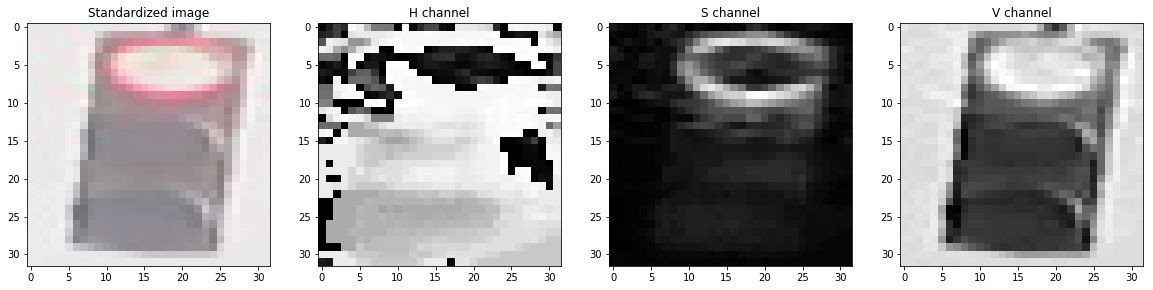

In [10]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


In [293]:
'''
Global variables for hue+saturation filters and bounding box used below in this notebook
Defining these globally so that all the main and helper functions are using a consistent standard that
can be managed in one place
''' 
# Hue Filter Definitions
# Chart in this stackoverflow post was helpful for tuning
# https://stackoverflow.com/questions/48109650/how-to-detect-two-different-colors-using-cv2-inrange-in-python-opencv
lower_green = np.array([60,10,0])
upper_green = np.array([110, 255, 255])
lower_red = np.array([120,35,120]) #[120,10,150]) 
upper_red = np.array([190,255,255])
lower_yellow = np.array([10, 10,0])
upper_yellow = np.array([49, 255, 255])
    
# Bounding Box Definitions
# Meant to approximately bound the area where a particular colored light will be, excluding other
# colors (e.g., bound red light, not yellow or green).
# 4-tuples (row min, row max, column min, column max)
# Don't use negative numbers so that these can be used to calculate areas
bound_box_green  = (21, 28, 12, 18)
bound_box_red    = (5, 11, 12, 18)
bound_box_yellow = (11, 20, 12, 18)
bound_box_red_hue = (3, 15, 12, 20) # special bounding box used for the Red Signal



0.56638655462184873

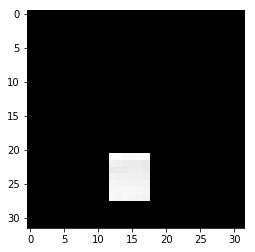

In [298]:
def brightness_feature(img_hsv, bound_box, verbose=False):
    """
    A helper function for the create_feature function that crops areas around each of the red, yellow, and green
    lights and calculates the average V (from HSV) value per pixel.
    
    Args:
    img_hsv = Image in hsv format
    bound_box = 4-tuple that defines a box that is intended to bound an area around where
      the hue mask will focus its "attention"
    
    Returns:
    A float between zero and one characterizing average brightness value per pixel.
    """
    row_min, row_max, col_min, col_max = bound_box
    
    # Create a "hue mask" that is zeros in the image area except for inside 
    # the bounding box where the values are ones
    mask = np.zeros((32,32), dtype=float)
    mask[row_min:row_max,col_min:col_max] = 1

    v = np.copy(img_hsv[:,:,2])

    # Crop image
    v[mask==0] = 0
    if verbose:
        #plt.set_title('V-channel image with bound box')
        plt.imshow(v, cmap='gray')
        
    return np.sum(v) / np.sum(mask) / 255

# Test code for brightness_feature
test_im = STANDARDIZED_LIST[0][0]
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)
brightness_feature(hsv, bound_box_green, True)

Hue Brightness Score:  0.53125
0.53125
0.0
0.166666666667
0.0952380952381


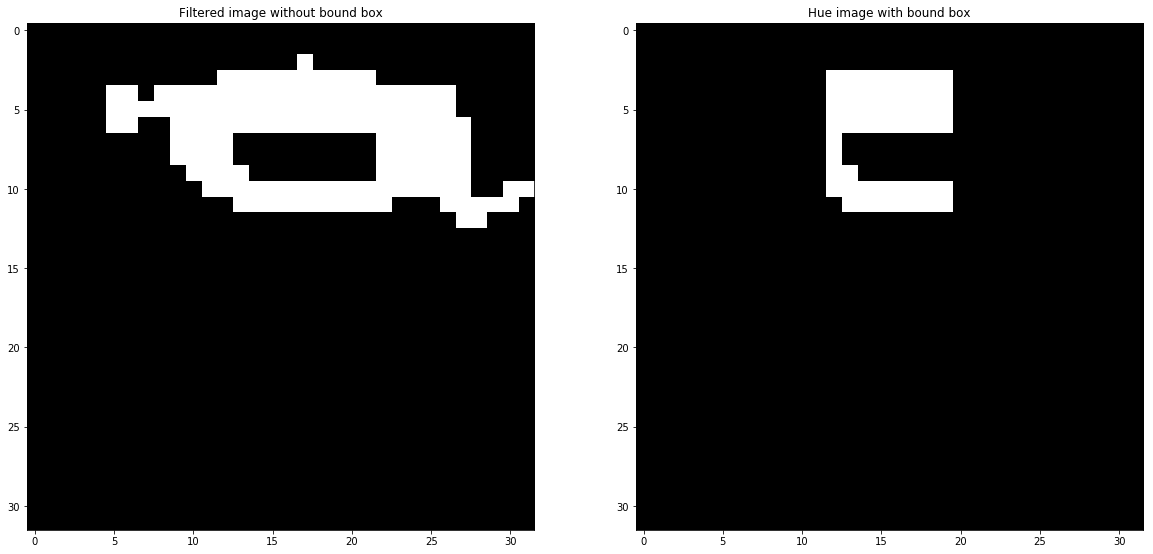

In [301]:
def hue_brightness_feature(img_hsv, bound_box, filter_low, filter_high, verbose=False):
    """
    Implements a hue brightness feature that is constrained by a filter which will only pass
    h, s, v values within a certain range and spatial location (a bounding box which crops
    the image). The values are then run through the mask function to essentially make a binary 
    image where a 1 means the pixel passed the filter criteria. The average value is returned as
    a score.
    
    Args:
    img_hsv = Image in hsv format
    bound_box = 4-tuple that defines a box that is intended to bound an area around where
      the hue mask will focus its "attention"
    filter = 2-tuple that defines the minimum and maximum hue values for h, s, v
    plot = Flag that when true will plot the color-filtered image with and without bound box
    
    Returns:
    A float between zero and one characterizing a hue brightness feature value 
     
    """
    row_min, row_max, col_min, col_max = bound_box
    
    # Create a "hue mask" that is zeros in the image area except for inside 
    # the bounding box where the values are ones
    mask = np.zeros((32,32), dtype=float)
    mask[row_min:row_max,col_min:col_max] = 1
    
    img_filtered = cv2.inRange(img_hsv, filter_low, filter_high)
    if verbose:
        f, ax = plt.subplots(1, 2, figsize=(20,10))
        ax[0].set_title('Filtered image without bound box')
        ax[0].imshow(img_filtered, cmap='gray')
        
    # Crop image
    img_filtered[mask==0] = 0
    if verbose:
        ax[1].set_title('Hue image with bound box')
        ax[1].imshow(img_filtered, cmap='gray')
     
    hue_brightness_score = np.sum(img_filtered) / np.sum(mask) / 255
    
    if verbose:
        print('Hue Brightness Score: ', hue_brightness_score)
    
    return hue_brightness_score

# Test code for hue_brightness_feature
test_im = STANDARDIZED_LIST[1][0]
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)
print(hue_brightness_feature(hsv, bound_box_red_hue, lower_red, upper_red, True))
print(hue_brightness_feature(hsv, bound_box_yellow, lower_yellow, upper_yellow))
print(hue_brightness_feature(hsv, bound_box_red, lower_yellow, upper_yellow))
print(hue_brightness_feature(hsv, bound_box_green, lower_green, upper_green))


---
<a id='task7'></a>
### (IMPLEMENTATION): Create a brightness feature that uses HSV color space

Write a function that takes in an RGB image and returns a 1D feature vector and/or single value that will help classify an image of a traffic light. The only requirement is that this function should apply an HSV colorspace transformation, the rest is up to you. 

From this feature, you should be able to estimate an image's label and classify it as either a red, green, or yellow traffic light. You may also define helper functions if they simplify your code.

In [190]:
def create_feature(rgb_image):
    '''
    Brightness feature function that takes in an RGB image and calculates a feature vector based on V channel of HSV space
    
    Returns: 3-tuple feature vector where each element is from 0-1, representing average brightness per pixel in the
                bounding box area
    '''
    
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Create and return a feature value
    feature = [brightness_feature(hsv_image, bound_box_red),
               brightness_feature(hsv_image, bound_box_yellow),
               brightness_feature(hsv_image, bound_box_green)
              ]
    
    return feature

## More features to help accurately label the traffic light images

In [286]:
def create_feature_red_signal(rgb_image):
    '''
    Feature to indicate high probability of red using hue and cropping
    
    Returns: True if there is high probability of red
    '''
    
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Create and return a feature value
    feature = [hue_brightness_feature(hsv_image, bound_box_red, lower_red, upper_red),
               hue_brightness_feature(hsv_image, bound_box_yellow, lower_yellow, upper_yellow),
               hue_brightness_feature(hsv_image, bound_box_red, lower_yellow, upper_yellow),
               hue_brightness_feature(hsv_image, bound_box_green, lower_green, upper_green)
              ]

    return hue_brightness_feature(hsv_image, bound_box_red_hue, lower_red, upper_red) > 0.20

In [284]:
def create_feature_green_signal(rgb_image):
    '''
    Feature to indicate high probability of green using hue and cropping
    
    Returns: True if there are sufficient hue-based signals for green and no hue-based signals for red or yellow
    '''
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Create and return a feature value
    if hue_brightness_feature(hsv_image, bound_box_red, lower_red, upper_red) == 0:
        if (hue_brightness_feature(hsv_image, bound_box_yellow, lower_yellow, upper_yellow) +
            hue_brightness_feature(hsv_image, bound_box_red, lower_yellow, upper_yellow))/2 == 0:
            if hue_brightness_feature(hsv_image, bound_box_green, lower_green, upper_green) > 0.75:
                return True
            else:
                return False

In [302]:
# Calculate statistics for the hue channel value for each of the Red, Yellow, and Green labeled images. 
# Compare them.
import pandas as pd
import statistics

h1=[]
h2=[]
h3_r=[]
h3_y=[]
h3_g=[]
h4_r=[]
h4_y=[]
h4_g=[]
is_r=[]
is_y=[]
is_g=[]

# Precalculate normalization factors
avg_denom_image = 32*32*255
avg_denom_bound_box_red = np.sum(hue_mask_r)*255
avg_denom_bound_box_yellow = np.sum(hue_mask_y)*255
avg_denom_bound_box_green = np.sum(hue_mask_g)*255

for i in range(len(STANDARDIZED_LIST)):
    label = STANDARDIZED_LIST[i][1]
    img = STANDARDIZED_LIST[i][0]
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    
    # Build list of hue total pixel value per image for R, Y, and G
    h1.append(np.sum(h))
    
    # Average hue value per pixel per image for R, Y, and G
    h2.append(np.sum(h)/avg_denom_image)
    
    # Average hue value per pixel per image with hsv filter for R, Y, and G
    mask_r = cv2.inRange(hsv, lower_red, upper_red)
    h3_r.append(np.sum(mask_r)/avg_denom_image)
    mask_y = cv2.inRange(hsv, lower_yellow, upper_yellow)
    h3_y.append(np.sum(mask_y)/avg_denom_image)
    mask_g = cv2.inRange(hsv, lower_green, upper_green)
    h3_g.append(np.sum(mask_g)/avg_denom_image)

    # Average hue value per pixel per image with hsv filter and bound box for R, Y, and G
    # Uses feature helper function hue_brightness_feature to calculate
    h4_r.append(hue_brightness_feature(hsv, bound_box_red, lower_red, upper_red))
    h4_y.append(hue_brightness_feature(hsv, bound_box_yellow, lower_yellow, upper_yellow))
    h4_g.append(hue_brightness_feature(hsv, bound_box_green, lower_green, upper_green))

    # Include label
    is_r.append(label[0])
    is_y.append(label[1])
    is_g.append(label[2])
    
df = pd.DataFrame({'Hue Avg': h1,
                   'Hue per Pix Avg': h2,
                   'Hue R Filter per Pix Avg': h3_r,
                   'Hue Y Filter per Pix Avg': h3_y,
                   'Hue G Filter per Pix Avg': h3_g,
                   'Hue R Filter+BB per Pix Avg': h4_r,
                   'Hue Y Filter+BB per Pix Avg': h4_y,
                   'Hue G Filter+BB per Pix Avg': h4_g,
                   'is_r': is_r,
                   'is_y': is_y,
                   'is_g': is_g
                  })

df_cols = df.columns.values.tolist()[:-3]

print(df[df_cols][df['is_r']==1].describe())
print(df[df_cols][df['is_y']==1].describe())
print(df[df_cols][df['is_g']==1].describe())


             Hue Avg  Hue per Pix Avg  Hue R Filter per Pix Avg  \
count     723.000000       723.000000                723.000000   
mean   123948.670816         0.474681                  0.124261   
std     29377.529721         0.112506                  0.072314   
min     22974.000000         0.087983                  0.000000   
25%    113658.000000         0.435271                  0.076172   
50%    131265.000000         0.502700                  0.106445   
75%    143164.000000         0.548269                  0.155273   
max    171556.000000         0.657001                  0.541992   

       Hue Y Filter per Pix Avg  Hue G Filter per Pix Avg  \
count                723.000000                723.000000   
mean                   0.027405                  0.071697   
std                    0.048495                  0.140366   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.00878

## (QUESTION 1): How do the features you made help you distinguish between the 3 classes of traffic light images?

**Answer:**
The primary classification is based on a brightness feature (brightness_feature helper function), as defined by the V channel in the HSV images. A Red Signal feature (create_feature_red_signal) was added to reduce the chances that a red light is missed, based on a hue range filter and a saturation minimum filter to reduce false positives (detecting red when it is not red). A Green Signal feature (create_feature_green_signal function) was added to reduce missed green signals when there is a strong signal based on hue. The Red Signal has priority over the brightness and Green Signal features - that is, if the Red Signal is positive then the algorithm returns red regardless of the other features.

All these features are applied to images cropped to eliminate area outside of the actual lights. There are separate cropping regions for each of red, yellow and green lights.

# 4. Classification and Visualizing Error

Using all of your features, write a function that takes in an RGB image and, using your extracted features, outputs whether a light is red, green or yellow as a one-hot encoded label. This classification function should be able to classify any image of a traffic light!

You are encouraged to write any helper functions or visualization code that you may need, but for testing the accuracy, make sure that this `estimate_label` function returns a one-hot encoded label.

---
<a id='task8'></a>
### (IMPLEMENTATION): Build a complete classifier 

In [287]:
def estimate_label(rgb_image):
    '''
    Analyzes RGB input image using feature creation code above and output a one-hot encoded label.
    '''
    # Calculate brightness value based feature
    img_feature_vector = create_feature(rgb_image)

    # Apply adjustment for Red Signal feature 
    if create_feature_red_signal(rgb_image):
        img_feature_vector[0]=1
    
    # Apply adjustment for Green Signal feature
    if create_feature_green_signal(rgb_image):
        img_feature_vector[2]*=1.5
    
    # Identify which adjusted feature value has highest and one-hot encode
    ryg_num = np.argmax(img_feature_vector)
    predicted_label = one_hot_encode(('red','yellow','green')[ryg_num])
    
    return predicted_label   

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook! This project will be complete once you've pogrammed a "good" classifier.

A "good" classifier in this case should meet the following criteria (and once it does, feel free to submit your project):
1. Get above 90% classification accuracy.
2. Never classify a red light as a green light. 

### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [288]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `MISCLASSIFIED`. This code is used for testing and *should not be changed*.

In [291]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

MISCLASS_RED=[]
MISCLASS_YELLOW=[]
MISCLASS_GREEN=[]

for i in MISCLASSIFIED:
    if (i[1][0]==0 and i[2][0]==1):
        MISCLASS_RED.append(i)
print(len(MISCLASS_RED), ' misclassed red')

for i in MISCLASSIFIED:
    if (i[1][1]==0 and i[2][1]==1):
        MISCLASS_YELLOW.append(i)
print(len(MISCLASS_YELLOW),' misclassed yellow')

for i in MISCLASSIFIED:
    if (i[1][2]==0 and i[2][2]==1):
        MISCLASS_GREEN.append(i)
print(len(MISCLASS_GREEN),' misclassed green')

Accuracy: 0.9865319865319865
Number of misclassified images = 4 out of 297
0  misclassed red
1  misclassed yellow
3  misclassed green


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

Image # 0 : Predicted  [1, 0, 0]  Label  [0, 0, 1]


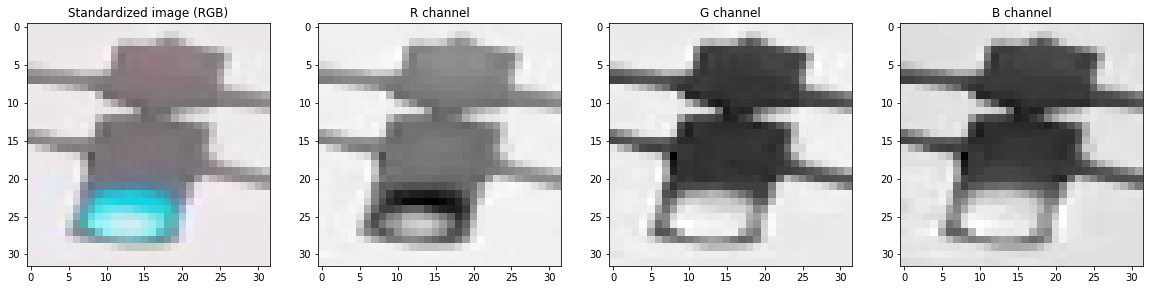

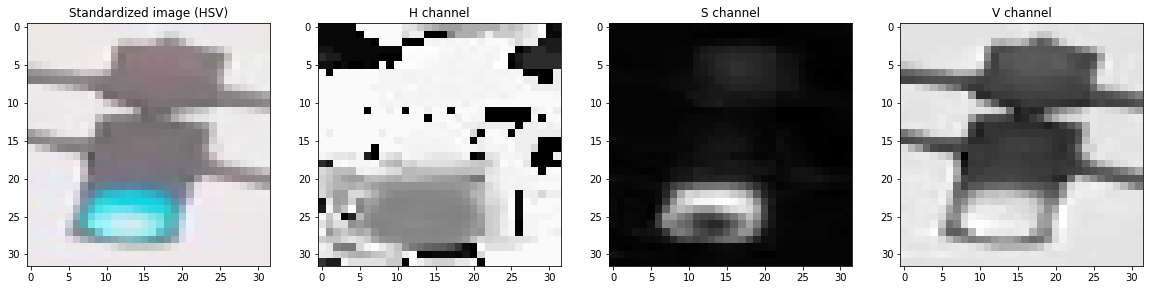

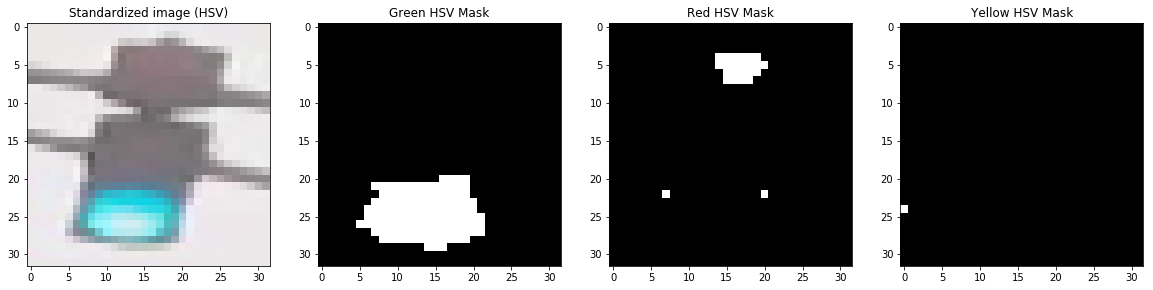

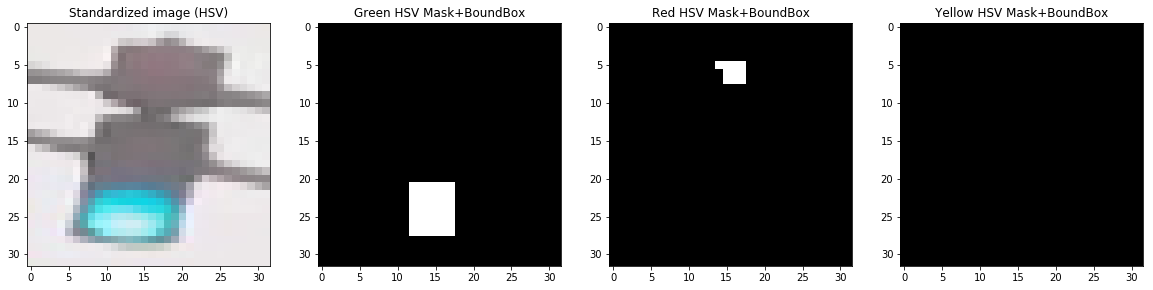

In [290]:
# Visualize misclassified example(s)

# Enter the image number from the MICLASSIFIED list (or STANDARDIZED, MISCLASS_RED, or MISCLASS_GREEN lists)
img_num = 0

# Code for using this code to analyze samples from overall training set
#label = STANDARDIZED_LIST[img_num][1]
#img = STANDARDIZED_LIST[img_num][0]
# print('Image #', img_num, ': Label ', label)

label = MISCLASSIFIED[img_num][2]
predicted = MISCLASSIFIED[img_num][1]
img = MISCLASSIFIED[img_num][0]

# Code for analyzing misclasses for Red or Green categories
#label = MISCLASS_RED[img_num][2]
#predicted = MISCLASS_RED[img_num][1]
#img = MISCLASS_RED[img_num][0]
#label = MISCLASS_GREEN[img_num][2]
#predicted = MISCLASS_GREEN[img_num][1]
#img = MISCLASS_GREEN[img_num][0]

print('Image #', img_num, ': Predicted ', predicted, ' Label ', label)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Debugging code for checking feature values for a given image
#print('R:', hue_brightness_feature(hsv, bound_box_red, lower_red, upper_red))
#print('R yellow bb:', hue_brightness_feature(hsv, bound_box_yellow, lower_red, upper_red))
#print('Y yellow bb:', hue_brightness_feature(hsv, bound_box_yellow, lower_yellow, upper_yellow))
#print('G:', hue_brightness_feature(hsv, bound_box_green, lower_green, upper_green))
#print('R hue:', hue_brightness_feature(hsv, bound_box_red_hue, lower_red, upper_red))
#print('R:', brightness_feature(hsv, bound_box_red))
#print('Y:', brightness_feature(hsv, bound_box_yellow))
#print('G:', brightness_feature(hsv, bound_box_green))

# RGB channels
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels for RGB
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20,10))
ax0.set_title('Standardized image (RGB)')
ax0.imshow(img)
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

# Visualize the individual hue, saturation,and value channels for HSV
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20,10))
ax0.set_title('Standardized image (HSV)')
ax0.imshow(img)
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

# Set masks per HSV filters above
mask_g = cv2.inRange(hsv, lower_green, upper_green)
mask_r = cv2.inRange(hsv, lower_red, upper_red)
mask_y = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Visualize the masks filtered by the global HSV filters defined above
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20,10))
ax0.set_title('Standardized image (HSV)')
ax0.imshow(img)
ax1.set_title('Green HSV Mask')
ax1.imshow(mask_g, cmap='gray')
ax2.set_title('Red HSV Mask')
ax2.imshow(mask_r, cmap='gray')
ax3.set_title('Yellow HSV Mask')
ax3.imshow(mask_y, cmap='gray')

# Set up bound box masks
hue_mask_r = np.zeros((32,32), dtype=float)
hue_mask_r[bound_box_red[0]:bound_box_red[1],bound_box_red[2]:bound_box_red[3]] = 1
hue_mask_y = np.zeros((32,32), dtype=float)
hue_mask_y[bound_box_yellow[0]:bound_box_yellow[1],bound_box_yellow[2]:bound_box_yellow[3]] = 1
hue_mask_g = np.zeros((32,32), dtype=float)
hue_mask_g[bound_box_green[0]:bound_box_green[1],bound_box_green[2]:bound_box_green[3]] = 1

# Crop per global bound boxes defined above
mask_r[hue_mask_r==0] = 0
mask_y[hue_mask_y==0] = 0
mask_g[hue_mask_g==0] = 0

# Visualize the masks filtered by r, y, g filters and cropped with the bound box filter
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20,10))
ax0.set_title('Standardized image (HSV)')
ax0.imshow(img)
ax1.set_title('Green HSV Mask+BoundBox')
ax1.imshow(mask_g, cmap='gray')
ax2.set_title('Red HSV Mask+BoundBox')
ax2.imshow(mask_r, cmap='gray')
ax3.set_title('Yellow HSV Mask+BoundBox')
ax3.imshow(mask_y, cmap='gray')

plt.show()

---
<a id='question2'></a>
## (Question 2): After visualizing these misclassifications, what weaknesses do you think your classification algorithm has? Please note at least two.

**Answer:** 
1. If overall image is low contrast - that is, the saturation value is very low and the picture is tending towards white, that could escape the red light safety feature, since it has a minimum saturation to prevent too many false positives (signalling red when it wasn't red) which would lower accuracy for green and yellow lights. In practice, I would probably recommend making that sacrifice since the cost of getting red light wrong could be catastrophic.
2. 20%+ of accuracy is due to the image cropping to reduce noise from background behind the traffic light (and the frame). If the traffic light is not well-centered, as it happens to be for most of these images, the algorithm could generate incorrect outputs.

## Test if you classify any red lights as green

**To pass this project, you must not classify any red lights as green!** Classifying red lights as green would cause a car to drive through a red traffic light, so this red-as-green error is very dangerous in the real world. 

The code below lets you test to see if you've misclassified any red lights as green in the test set. **This test assumes that `MISCLASSIFIED` is a list of tuples with the order: [misclassified_image, predicted_label, true_label].**

Note: this is not an all encompassing test, but its a good indicator that, if you pass, you are on the right track! This iterates through your list of misclassified examples and checks to see if any red traffic lights have been mistakenly labelled [0, 1, 0] (green).

In [276]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")


**<span style="color: green;">TEST PASSED</span>**

# 5. Improve your algorithm!

**Submit your project after you have completed all implementations, answered all questions, AND when you've met the two criteria:**
1. Greater than 90% accuracy classification
2. No red lights classified as green

If you did not meet these requirements (which is common on the first attempt!), revisit your algorithm and tweak it to improve light recognition -- this could mean changing the brightness feature, performing some background subtraction, or adding another feature!

---

### Going Further (Optional Challenges)

If you found this challenge easy, I suggest you go above and beyond! Here are a couple **optional** (meaning you do not need to implement these to submit and pass the project) suggestions:
* (Optional) Aim for >95% classification accuracy.
* (Optional) Some lights are in the shape of arrows; further classify the lights as round or arrow-shaped.
* (Optional) Add another feature and aim for as close to 100% accuracy as you can get!